# Home Credit Score Card Model

## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 

#  Load Data
print("Sedang memuat data... Mohon tunggu sebentar.")
try:
    app_train = pd.read_csv('application_train.csv')
    app_test = pd.read_csv('application_test.csv')
    print("Data berhasil dimuat!")
    print(f"Ukuran Train: {app_train.shape}")
    print(f"Ukuran Test: {app_test.shape}")
except FileNotFoundError:
    print("Error: File tidak ditemukan. Mohon cek kembali path folder Anda.")

Sedang memuat data... Mohon tunggu sebentar.
Data berhasil dimuat!
Ukuran Train: (307511, 122)
Ukuran Test: (48744, 121)


### Data Health Check

In [3]:
def check_data_structure(df, name="Dataset"):
    print(f"--- Struktur Data: {name} ---")
    
    # Cek Tipe Data
    dtype_counts = df.dtypes.value_counts()
    print("\n1. Komposisi Tipe Data:")
    print(dtype_counts)
    
    # Memisahkan kolom Numerik dan Kategorikal
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    
    print(f"\nJumlah Kolom Numerik: {len(num_cols)}")
    print(f"Jumlah Kolom Kategorikal (Object): {len(cat_cols)}")
    
    # Preview sampel
    print("\n2. Preview 5 Baris Teratas:")
    display(df.head())

# Jalankan fungsi
check_data_structure(app_train, "Application Train")

--- Struktur Data: Application Train ---

1. Komposisi Tipe Data:
float64    65
int64      41
object     16
Name: count, dtype: int64

Jumlah Kolom Numerik: 106
Jumlah Kolom Kategorikal (Object): 16

2. Preview 5 Baris Teratas:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Missing value

Dataset memiliki 122 kolom.
Terdapat 67 kolom yang memiliki missing values.

Top 20 Kolom dengan Missing Value Terbanyak:


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


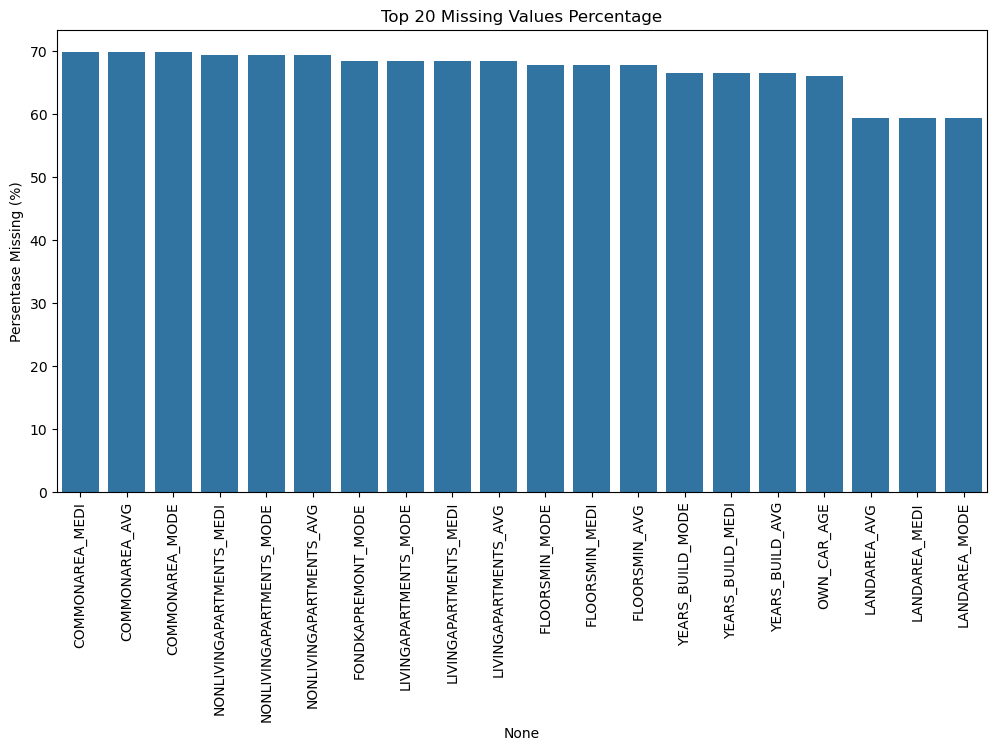

In [4]:
def check_missing_values(df):
    # Hitung jumlah null dan persentasenya
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Buat tabel
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}
    )
    
    # Filter hanya yang ada missing value-nya dan urutkan
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
    print(f"Dataset memiliki {df.shape[1]} kolom.")
    print(f"Terdapat {mis_val_table_ren_columns.shape[0]} kolom yang memiliki missing values.")
    
    return mis_val_table_ren_columns

# Cek Missing Values di Train Data
missing_train = check_missing_values(app_train)

# Tampilkan 20 kolom dengan missing value terbanyak
print("\nTop 20 Kolom dengan Missing Value Terbanyak:")
display(missing_train.head(20))

# Visualisasi (Opsional tapi membantu)
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_train.head(20).index, y=missing_train.head(20)['% of Total Values'])
plt.xticks(rotation=90)
plt.title('Top 20 Missing Values Percentage')
plt.ylabel('Persentase Missing (%)')
plt.show()

### Descriptive Statistic

In [6]:
def check_statistics(df):
    print("--- Statistik Data Numerik ---")
    # Tampilkan transpose agar lebih mudah dibaca jika kolomnya banyak
    display(df.describe().T)
    
    print("\n--- Statistik Data Kategorikal ---")
    display(df.describe(include=['O']).T)

check_statistics(app_train)

--- Statistik Data Numerik ---


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0



--- Statistik Data Kategorikal ---


,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


## Data Cleaning

### Handling Duplicate

In [7]:
def handle_duplicates(df):
    print("--- 1. Cek Duplikat ---")
    
    # Cek duplikat baris (semua kolom sama persis)
    duplicates = df.duplicated().sum()
    print(f"Jumlah baris duplikat penuh: {duplicates}")
    
    if duplicates > 0:
        df.drop_duplicates(inplace=True)
        print("Baris duplikat telah dihapus.")
    
    # Cek duplikat pada ID Utama (SK_ID_CURR)
    # ID harus unik. Jika ada ID sama tapi datanya beda, ini aneh.
    id_duplicates = df.duplicated(subset=['SK_ID_CURR']).sum()
    print(f"Jumlah duplikat pada SK_ID_CURR: {id_duplicates}")
    
    return df

app_train = handle_duplicates(app_train)

--- 1. Cek Duplikat ---
Jumlah baris duplikat penuh: 0
Jumlah duplikat pada SK_ID_CURR: 0


### Handling Anomali Data

In [8]:
def handle_anomalies(df):
    print("\n--- 2. Menangani Anomali ---")
    
    # Anomali DAYS_EMPLOYED: 365243
    anomali_count = (df['DAYS_EMPLOYED'] == 365243).sum()
    print(f"Jumlah data dengan DAYS_EMPLOYED 365243 (Anomali): {anomali_count}")
    
    # Strategi Senior DS:
    # Jangan langsung replace dan lupakan. Kita buat kolom baru penanda (Flag)
    # karena status "Pensiunan/Anomali" ini mungkin prediktif terhadap risiko kredit.
    
    # 1. Buat Flag
    df['DAYS_EMPLOYED_ANOM'] = (df['DAYS_EMPLOYED'] == 365243).astype(int)
    
    # 2. Replace nilai anomali dengan NaN (agar nanti bisa diimputasi atau dibiarkan NaN)
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
    
    print("Anomali DAYS_EMPLOYED telah diganti NaN dan kolom Flag 'DAYS_EMPLOYED_ANOM' telah dibuat.")
    
    # Opsional: Mengubah DAYS_BIRTH dari negatif ke positif (Umur dalam tahun) agar masuk akal
    df['AGE_YEARS'] = abs(df['DAYS_BIRTH']) / 365
    print("Kolom 'AGE_YEARS' (positif) berhasil dibuat dari DAYS_BIRTH.")
    
    return df

app_train = handle_anomalies(app_train)


--- 2. Menangani Anomali ---
Jumlah data dengan DAYS_EMPLOYED 365243 (Anomali): 55374
Anomali DAYS_EMPLOYED telah diganti NaN dan kolom Flag 'DAYS_EMPLOYED_ANOM' telah dibuat.
Kolom 'AGE_YEARS' (positif) berhasil dibuat dari DAYS_BIRTH.


C:\Users\user\AppData\Local\Temp\ipykernel_14472\2634478921.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)


### Corection Data Type

In [9]:
def correct_data_types(df):
    print("\n--- 3. Koreksi Tipe Data ---")
    
    # Pastikan ID adalah string/object agar tidak ikut terhitung dalam statistik numerik
    # Namun, seringkali di pandas dibiarkan int agar ringan, asal kita ingat itu ID.
    # Di sini kita biarkan int, tapi pastikan TARGET adalah integer.
    
    if 'TARGET' in df.columns:
        df['TARGET'] = df['TARGET'].astype(int)
    
    # Optimasi Memori: Ubah Object dengan unik sedikit menjadi Category
    # Contoh: CODE_GENDER, NAME_CONTRACT_TYPE
    for col in df.select_dtypes(include=['object']):
        if df[col].nunique() <= 50: # Batas threshold
            df[col] = df[col].astype('category')
            
    print("Optimasi tipe data selesai (Object -> Category untuk kardinalitas rendah).")
    return df

app_train = correct_data_types(app_train)


--- 3. Koreksi Tipe Data ---
Optimasi tipe data selesai (Object -> Category untuk kardinalitas rendah).


## EDA 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style agar grafik terlihat rapi
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 6)

print("Setup visualisasi siap.")

Setup visualisasi siap.


### Univariate Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_14472\3932158826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_14472\3932158826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_14472\3932158826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_144

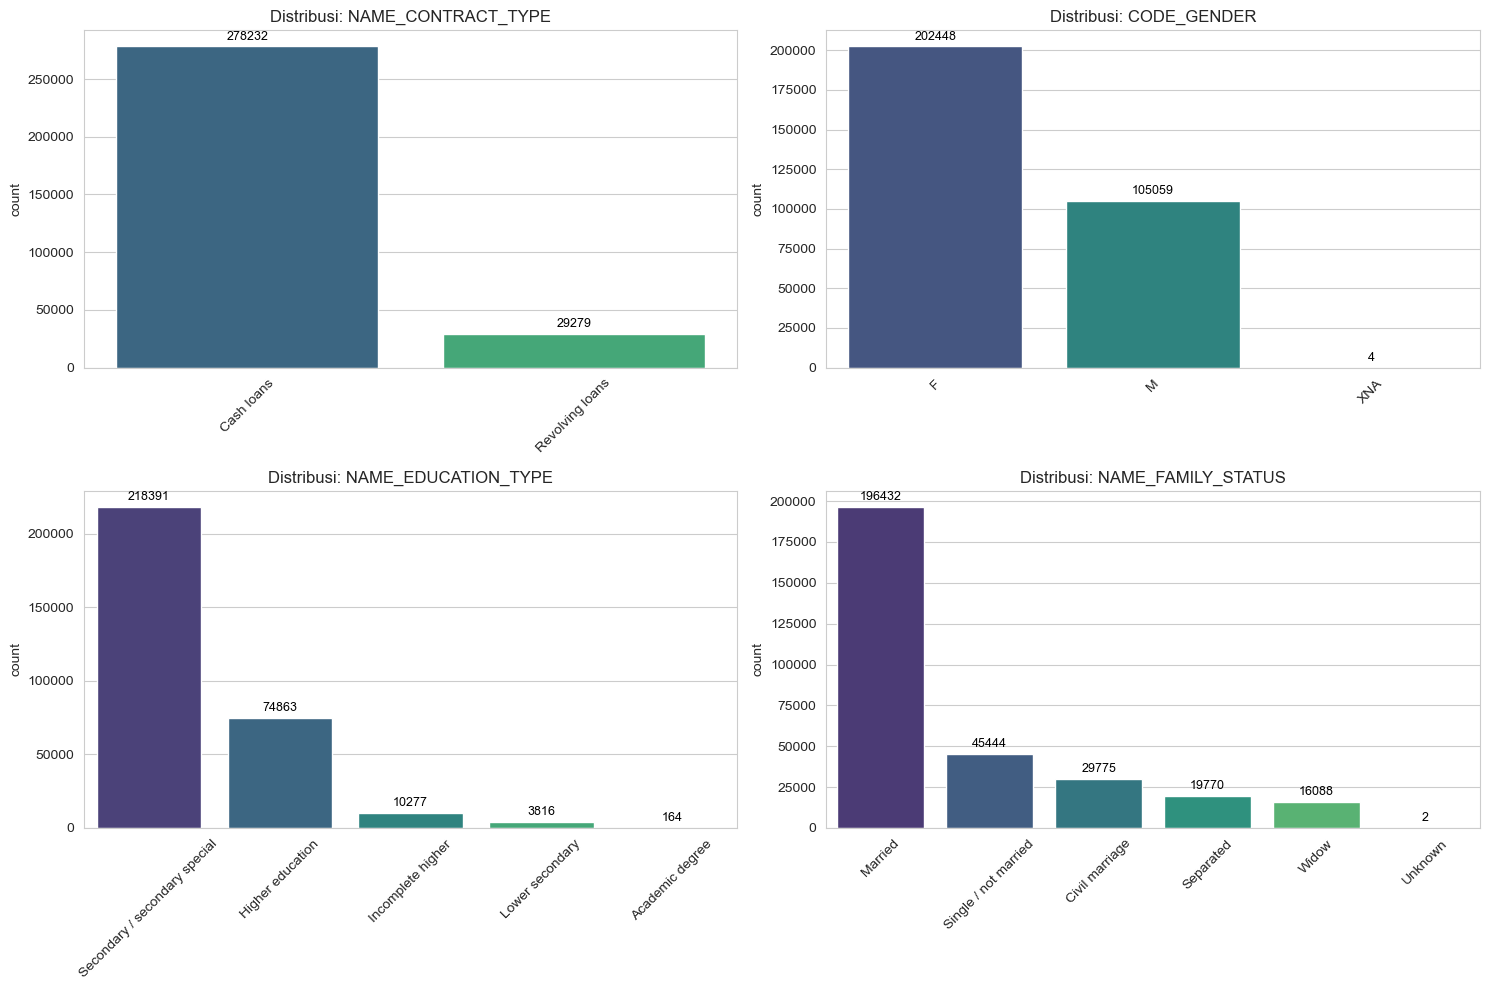

In [11]:
def plot_categorical_univariate(df, columns):
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        # Hitung jumlah dan urutkan
        order = df[col].value_counts().index
        ax = sns.countplot(data=df, x=col, order=order, palette='viridis')
        plt.title(f'Distribusi: {col}')
        plt.xticks(rotation=45)
        plt.xlabel('')
        
        # Menambahkan label angka di atas bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                        textcoords='offset points')
            
    plt.tight_layout()
    plt.show()

# Pilih kolom kategorikal kunci
key_cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']
plot_categorical_univariate(app_train, key_cat_cols)

--- Deep Univariat: Deteksi Outlier ---


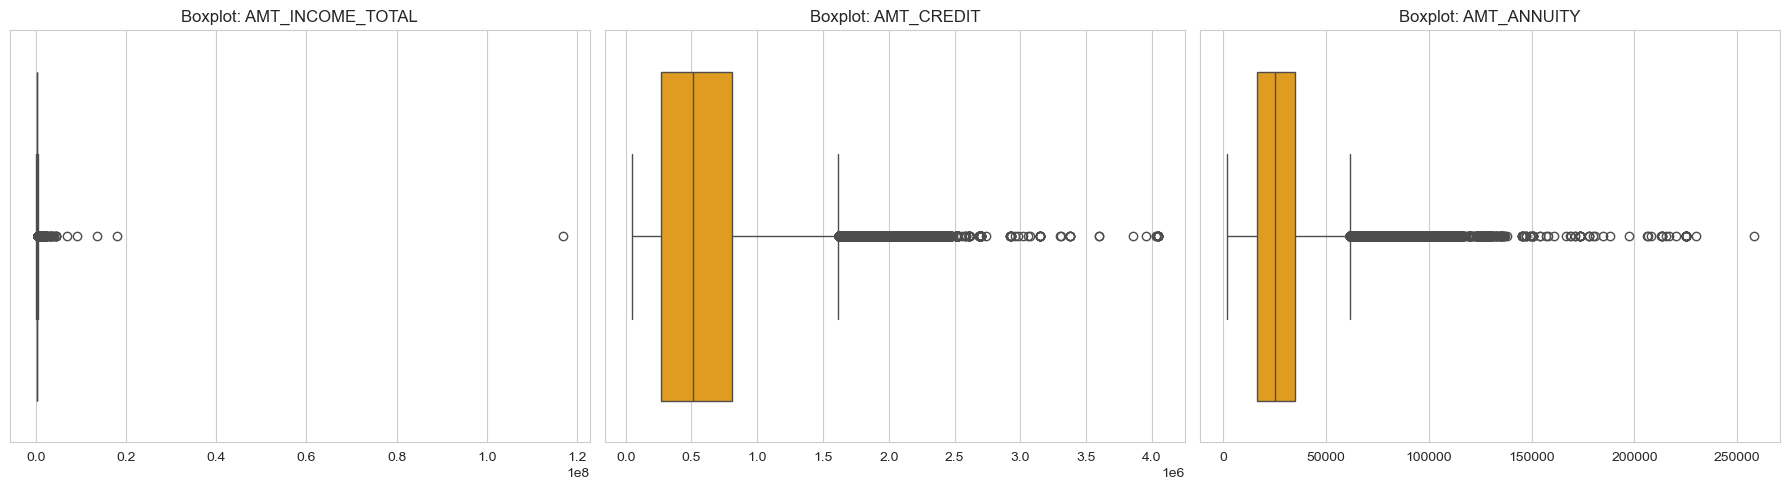

In [16]:
def deep_univariate_outliers(df):
    print("--- Deep Univariat: Deteksi Outlier ---")
    
    features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
    plt.figure(figsize=(18, 5))
    
    for i, col in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x=df[col], color='orange')
        plt.title(f'Boxplot: {col}')
        plt.xlabel('')
        
    plt.tight_layout()
    plt.show()

deep_univariate_outliers(app_train)

### Bivarate Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_14472\2386301140.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby(col)['TARGET'].mean().reset_index().sort_values(by='TARGET', ascending=False)
C:\Users\user\AppData\Local\Temp\ipykernel_14472\2386301140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='TARGET', data=temp, palette='Reds_r')


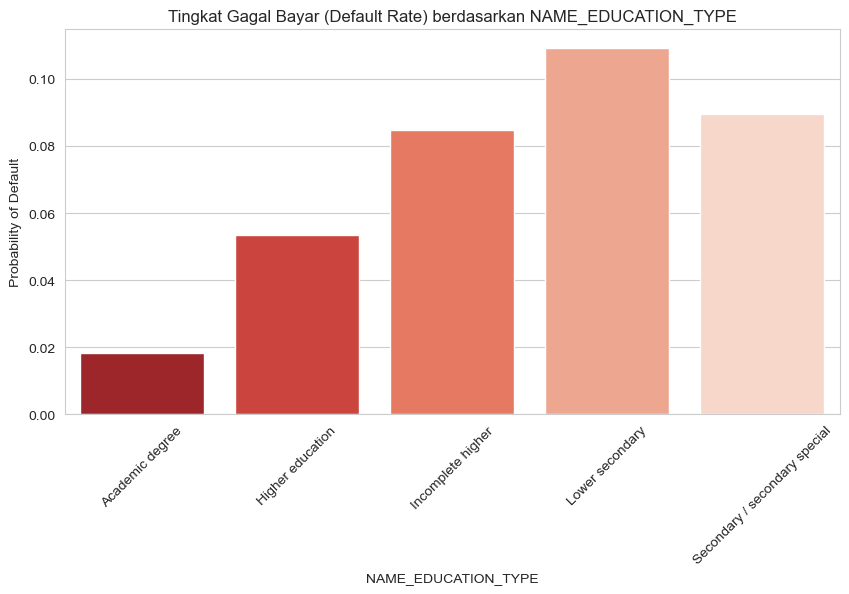

In [12]:
def plot_categorical_bivariate(df, col):
    # Hitung rata-rata Target (karena Target 0/1, rata-rata = persentase default)
    temp = df.groupby(col)['TARGET'].mean().reset_index().sort_values(by='TARGET', ascending=False)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='TARGET', data=temp, palette='Reds_r')
    plt.title(f'Tingkat Gagal Bayar (Default Rate) berdasarkan {col}')
    plt.ylabel('Probability of Default')
    plt.xticks(rotation=45)
    plt.show()

# Cek Pendidikan dan Pekerjaan vs Risiko
plot_categorical_bivariate(app_train, 'NAME_EDUCATION_TYPE')
# plot_categorical_bivariate(app_train, 'NAME_INCOME_TYPE') # Silakan uncomment jika ingin melihat jenis pendapatan

C:\Users\user\AppData\Local\Temp\ipykernel_14472\359402283.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label='Target 0 (Lancar)', shade=True, color='blue')
C:\Users\user\AppData\Local\Temp\ipykernel_14472\359402283.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label='Target 1 (Gagal)', shade=True, color='red')


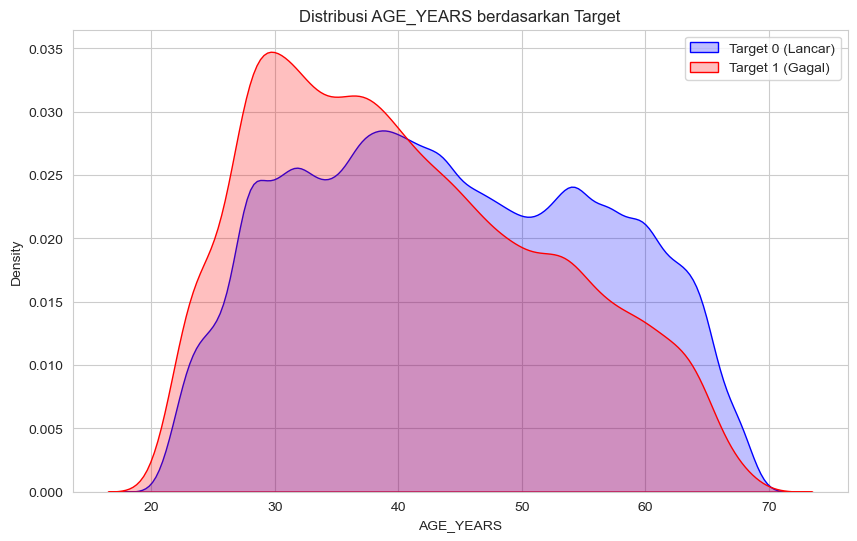

In [13]:
def plot_kde_target(df, feature):
    plt.figure(figsize=(10, 6))
    
    # Plot Target = 0 (Lancar) - Warna Biru
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label='Target 0 (Lancar)', shade=True, color='blue')
    
    # Plot Target = 1 (Gagal) - Warna Merah
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label='Target 1 (Gagal)', shade=True, color='red')
    
    plt.title(f'Distribusi {feature} berdasarkan Target')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Cek Umur vs Target (Salah satu prediktor terkuat)
plot_kde_target(app_train, 'AGE_YEARS')

# Cek Days Employed (Berapa lama bekerja)
# Catatan: Kita pakai visualisasi pada range yang masuk akal (misal < 50 tahun kerja)
# app_train['YEARS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED']) / 365
# plot_kde_target(app_train, 'YEARS_EMPLOYED')

--- Deep Bivariat: Risiko Berdasarkan Tipe Organisasi ---


C:\Users\user\AppData\Local\Temp\ipykernel_14472\3582050534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=org_risk_filtered.head(10).index, y=org_risk_filtered.head(10)['default_rate'], palette='magma')


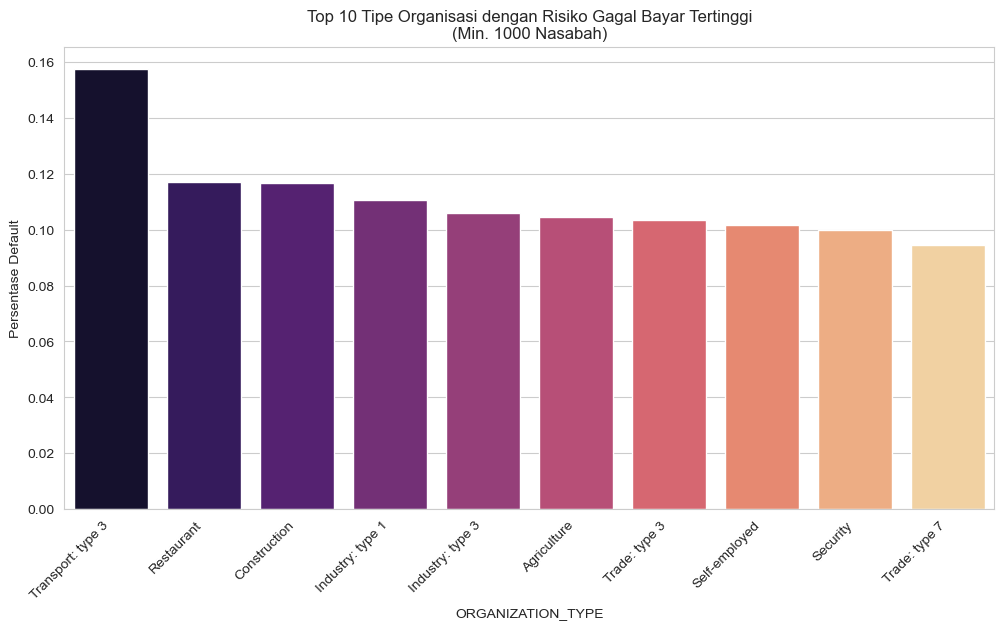

Default Rate untuk 'Business Entity Type 3': 9.30%


In [17]:
def analyze_organization_risk(df):
    print("--- Deep Bivariat: Risiko Berdasarkan Tipe Organisasi ---")
    
    org_risk = df.groupby('ORGANIZATION_TYPE')['TARGET'].agg(['mean', 'count'])
    org_risk.columns = ['default_rate', 'count']
    
    org_risk_filtered = org_risk[org_risk['count'] > 1000].sort_values(by='default_rate', ascending=False)
    
   
    plt.figure(figsize=(12, 6))
    sns.barplot(x=org_risk_filtered.head(10).index, y=org_risk_filtered.head(10)['default_rate'], palette='magma')
    plt.title('Top 10 Tipe Organisasi dengan Risiko Gagal Bayar Tertinggi\n(Min. 1000 Nasabah)')
    plt.ylabel('Persentase Default')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    
    be3_rate = org_risk.loc['Business Entity Type 3', 'default_rate'] if 'Business Entity Type 3' in org_risk.index else 0
    print(f"Default Rate untuk 'Business Entity Type 3': {be3_rate:.2%}")

analyze_organization_risk(app_train)


--- 2. Profiling: Persona Nasabah Gagal Bayar vs Lancar ---
Rata-rata Karakteristik:


,Lancar (0),Gagal Bayar (1),Diff (%)
AGE_YEARS,44.21,40.78,-7.77
YEARS_EMPLOYED,6.68,4.97,-25.56
AMT_INCOME_TOTAL,169077.72,165611.76,-2.05
AMT_CREDIT,602648.28,557778.53,-7.45
EXT_SOURCE_1,0.51,0.39,-24.34
EXT_SOURCE_2,0.52,0.41,-21.50
EXT_SOURCE_3,0.52,0.39,-25.00


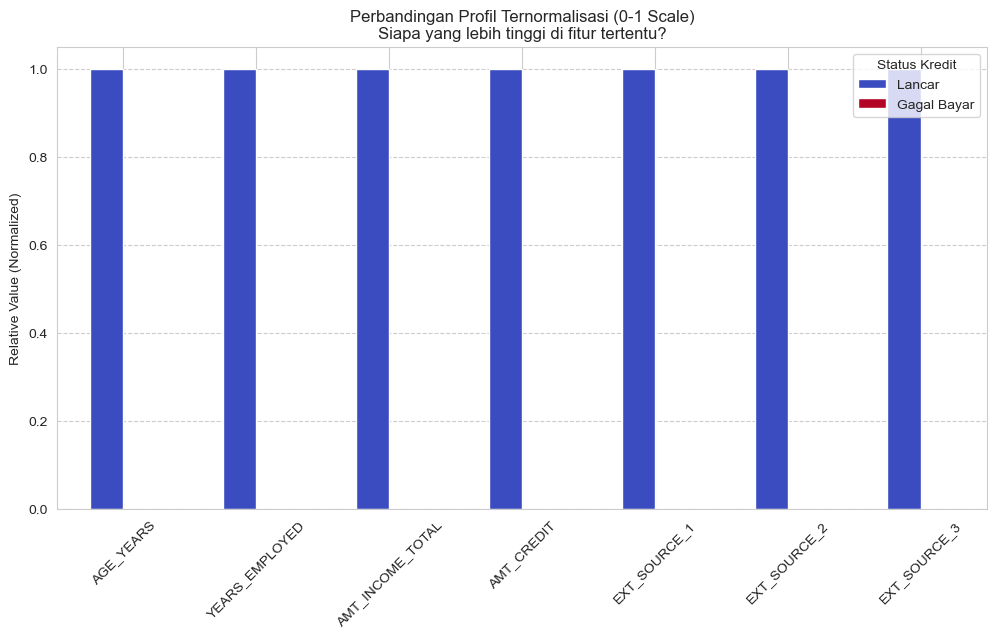

In [18]:
def customer_profiling(df):
    print("\n--- 2. Profiling: Persona Nasabah Gagal Bayar vs Lancar ---")
    
    if 'AGE_YEARS' not in df.columns:
        df['AGE_YEARS'] = abs(df['DAYS_BIRTH']) / 365
        
    
    df['YEARS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']) / 365
    
    # Pilih fitur fitur kunci untuk profiling
    features = ['AGE_YEARS', 'YEARS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
    
    # Hitung rata-rata berdasarkan Target
    profile = df.groupby('TARGET')[features].mean().T
    profile.columns = ['Lancar (0)', 'Gagal Bayar (1)']
    
    # Hitung % Perbedaan (Gagal Bayar itu lebih tinggi/rendah berapa persen dibanding Lancar?)
    profile['Diff (%)'] = ((profile['Gagal Bayar (1)'] - profile['Lancar (0)']) / profile['Lancar (0)']) * 100
    
    # Tampilkan tabel angka
    print("Rata-rata Karakteristik:")
    display(profile.round(2))
    
    # Visualisasi Perbandingan Normalisasi
    # Kita standarisasi agar bisa masuk dalam satu grafik (karena Income jutaan vs Umur puluhan susah dibandingkan)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    # Ambil rata-rata lalu scale
    grouped = df.groupby('TARGET')[features].mean()
    scaled_data = pd.DataFrame(scaler.fit_transform(grouped), columns=features, index=['Lancar', 'Gagal Bayar'])
    
    # Plotting "Parallel Coordinates" style bar chart
    scaled_data.T.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
    plt.title('Perbandingan Profil Ternormalisasi (0-1 Scale)\nSiapa yang lebih tinggi di fitur tertentu?')
    plt.ylabel('Relative Value (Normalized)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.legend(title='Status Kredit')
    plt.show()

customer_profiling(app_train)


--- 3. Profil Sosial: Pendidikan & Status Keluarga ---


C:\Users\user\AppData\Local\Temp\ipykernel_14472\570174677.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  social_risk = df.groupby(['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'])['TARGET'].mean().reset_index()


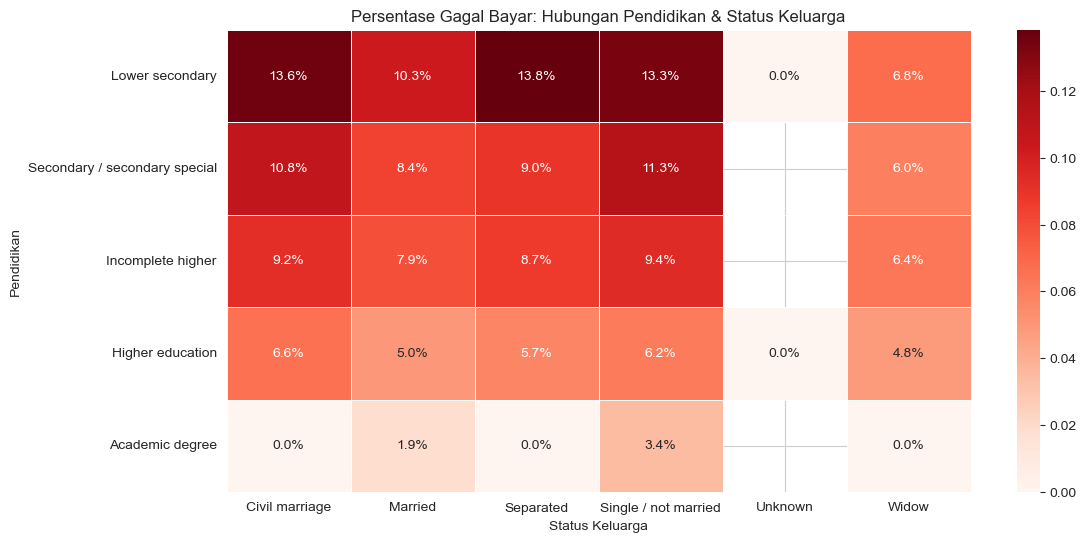

In [19]:
def social_profile_risk(df):
    print("\n--- 3. Profil Sosial: Pendidikan & Status Keluarga ---")
    
    # Grouping dua kategori sekaligus
    social_risk = df.groupby(['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'])['TARGET'].mean().reset_index()
    
    # Pivot untuk visualisasi yang enak dilihat
    social_pivot = social_risk.pivot(index='NAME_EDUCATION_TYPE', 
                                     columns='NAME_FAMILY_STATUS', 
                                     values='TARGET')
    
    # Urutkan index berdasarkan rata-rata risiko tertinggi agar rapi
    sort_idx = social_pivot.mean(axis=1).sort_values(ascending=False).index
    social_pivot = social_pivot.loc[sort_idx]
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(social_pivot, annot=True, cmap='Reds', fmt='.1%', linewidths=.5)
    plt.title('Persentase Gagal Bayar: Hubungan Pendidikan & Status Keluarga')
    plt.ylabel('Pendidikan')
    plt.xlabel('Status Keluarga')
    plt.show()

social_profile_risk(app_train)

### Corelation 

--- Analisis Korelasi (Deep Dive) ---
Top 5 Korelasi Positif (Makin tinggi angka, makin berisiko default):
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239

Top 5 Korelasi Negatif (Makin tinggi angka, makin aman):
EXT_SOURCE_3         -0.178919
EXT_SOURCE_2         -0.160472
EXT_SOURCE_1         -0.155317
AGE_YEARS            -0.078239
DAYS_EMPLOYED_ANOM   -0.045987


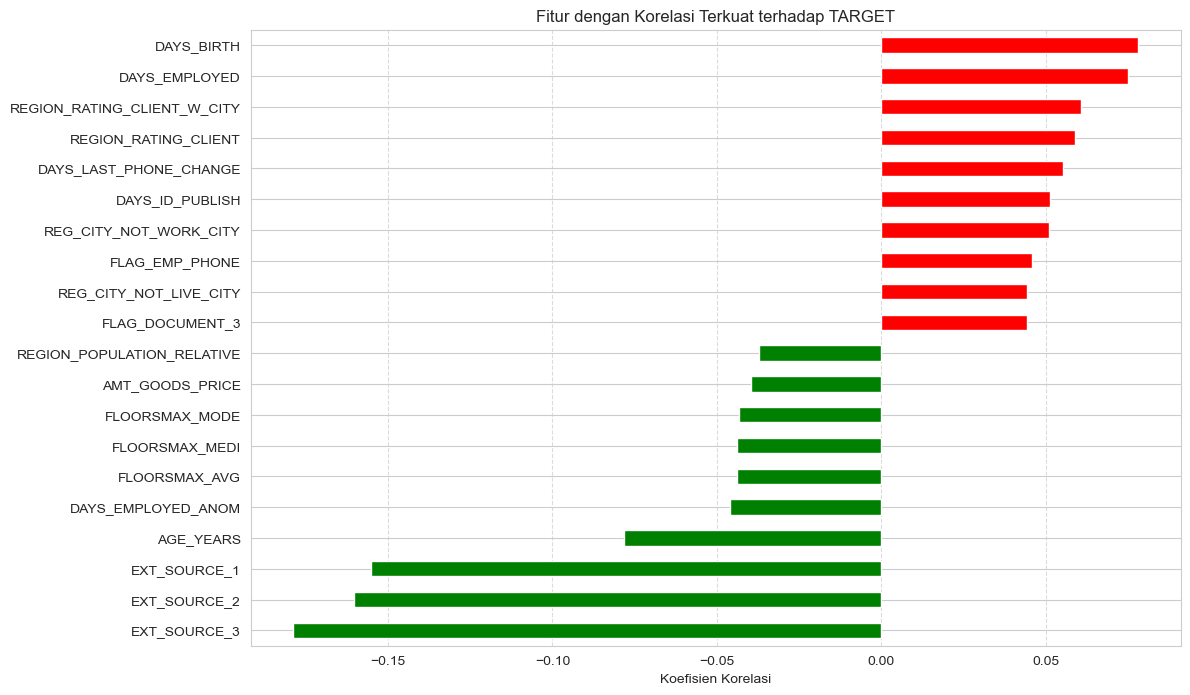

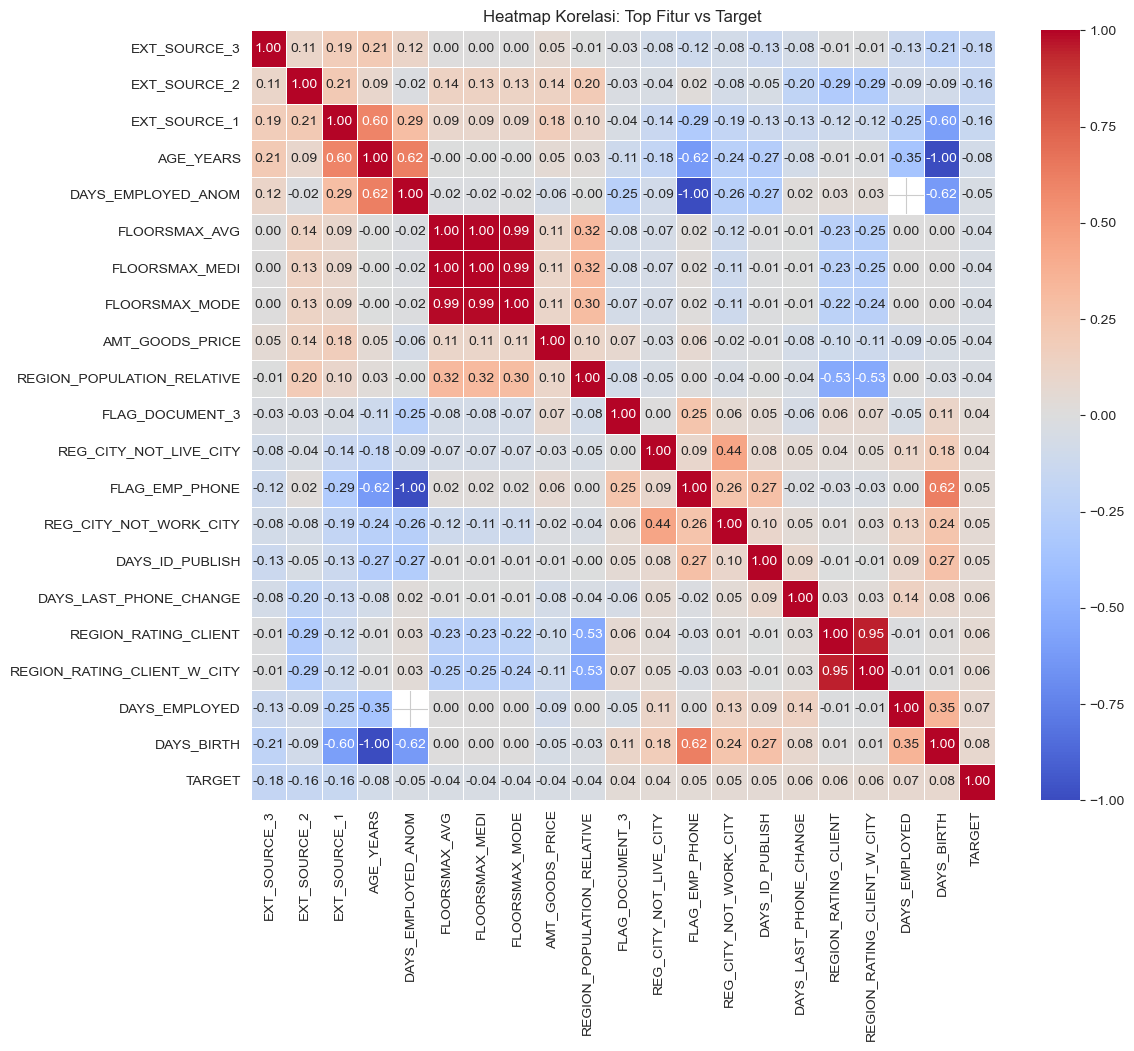

In [15]:
def plot_correlation_heatmap(df):
    print("--- Analisis Korelasi (Deep Dive) ---")
    
    
    numeric_df = df.select_dtypes(include=[np.number])
    
    
    correlations = numeric_df.corr()['TARGET'].sort_values()
    
    print("Top 5 Korelasi Positif (Makin tinggi angka, makin berisiko default):")
    print(correlations.tail(6).drop('TARGET').to_string()) # Drop Target itu sendiri
    
    print("\nTop 5 Korelasi Negatif (Makin tinggi angka, makin aman):")
    print(correlations.head(5).to_string())
    
    # Visualisasi Bar Plot untuk Kekuatan Korelasi
    # Gabungkan top negatif dan top positif untuk divisualisasikan
    top_corr_features = pd.concat([correlations.head(10), correlations.tail(11)])
    top_corr_features = top_corr_features.drop('TARGET') # Hapus target agar grafik tidak bias
    
    plt.figure(figsize=(12, 8))
    top_corr_features.plot(kind='barh', color=np.where(top_corr_features > 0, 'red', 'green'))
    plt.title('Fitur dengan Korelasi Terkuat terhadap TARGET')
    plt.xlabel('Koefisien Korelasi')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    # Heatmap Antar Fitur Terkuat
    # Kita ingin melihat apakah fitur-fitur kuat ini saling berhubungan 
    top_cols = top_corr_features.index.tolist() + ['TARGET']
    corr_matrix = numeric_df[top_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=0.5)
    plt.title('Heatmap Korelasi: Top Fitur vs Target')
    plt.show()

plot_correlation_heatmap(app_train)

## Feature Engineering & Preprocessing

### Feature Engineering

In [20]:
import pandas as pd
import numpy as np
import gc # Garbage Collector untuk hemat memori

def create_domain_features(df):
    print("--- 1. Feature Engineering: Membuat Domain Features ---")
    
    # Kloning dataframe agar aman
    df_eng = df.copy()
    
    # 1. Credit to Income Ratio (Beban hutang dibanding gaji)
    # Semakin tinggi, semakin berat beban nasabah
    df_eng['CREDIT_INCOME_PERCENT'] = df_eng['AMT_CREDIT'] / df_eng['AMT_INCOME_TOTAL']
    
    # 2. Annuity to Income Ratio (Cicilan bulanan dibanding gaji)
    # Berapa persen gaji habis buat bayar cicilan ini?
    df_eng['ANNUITY_INCOME_PERCENT'] = df_eng['AMT_ANNUITY'] / df_eng['AMT_INCOME_TOTAL']
    
    # 3. Credit Term (Jangka waktu kredit dalam bulan)
    # Cicilan tahunan / Total kredit (estimasi durasi)
    df_eng['CREDIT_TERM'] = df_eng['AMT_ANNUITY'] / df_eng['AMT_CREDIT']
    
    # 4. Days Employed Percent (Berapa persen hidupnya sudah dipakai buat kerja?)
    # Ingat DAYS_EMPLOYED tadinya negatif, kita asumsikan sudah di-clean atau pakai abs
    # Jika masih ada nilai 365243 (anomali), pastikan sudah jadi NaN di step sebelumnya
    df_eng['DAYS_EMPLOYED_PERCENT'] = df_eng['DAYS_EMPLOYED'] / df_eng['DAYS_BIRTH']
    
    print("Fitur baru berhasil dibuat: CREDIT_INCOME_PERCENT, ANNUITY_INCOME_PERCENT, CREDIT_TERM, DAYS_EMPLOYED_PERCENT")
    return df_eng

# Terapkan
app_train_eng = create_domain_features(app_train)

--- 1. Feature Engineering: Membuat Domain Features ---
Fitur baru berhasil dibuat: CREDIT_INCOME_PERCENT, ANNUITY_INCOME_PERCENT, CREDIT_TERM, DAYS_EMPLOYED_PERCENT


### Encoding

- Label Encoding: Untuk kolom dengan 2 kategori saja (Laki/Perempuan, Ya/Tidak). Lebih hemat memori.
- One-Hot Encoding: Untuk kategori > 2.

In [21]:
from sklearn.preprocessing import LabelEncoder

def efficient_encoding(df):
    print("\n--- 2. Encoding Kategorikal ---")
    le = LabelEncoder()
    le_count = 0
    
    # Loop semua kolom
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Jika hanya ada 2 kategori (Binary), pakai Label Encoder
            if len(list(df[col].unique())) <= 2:
                df[col] = le.fit_transform(df[col].astype(str))
                le_count += 1
    
    print(f'{le_count} kolom telah di-Label Encoding.')
    
    # Sisanya (kategori > 2) pakai One-Hot Encoding (get_dummies)
    # drop_first=True untuk menghindari multikolinearitas (Dummy Variable Trap)
    df = pd.get_dummies(df, drop_first=True)
    
    print(f'Ukuran data setelah One-Hot Encoding: {df.shape}')
    return df

app_train_encoded = efficient_encoding(app_train_eng)

# Bersihkan memori
del app_train_eng
gc.collect()


--- 2. Encoding Kategorikal ---
3 kolom telah di-Label Encoding.
Ukuran data setelah One-Hot Encoding: (307511, 237)


45784

### Feature Selection

Daripada memaksa komputer mengolah 240+ kolom (setelah one-hot encoding), kita pilih fitur yang punya korelasi terkuat dengan TARGET.
Kita akan ambil:
Fitur Domain Baru (yang kita buat di langkah 1 Feature engineering).
Top 30 Fitur dengan korelasi tertinggi (Positif/Negatif) terhadap Target.

In [22]:
def select_important_features(df, target_col='TARGET', n_top=30):
    print("\n--- 3. Feature Selection (Smart Filtering) ---")
    
    # Hitung korelasi semua kolom terhadap TARGET
    correlations = df.corr()[target_col].abs().sort_values(ascending=False)
    
    # Ambil nama fitur dengan korelasi tertinggi
    # Kita skip index 0 karena itu adalah 'TARGET' itu sendiri (korelasi 1.0)
    top_features = correlations.index[1:n_top+1].tolist()
    
    print(f"Top {n_top} fitur dengan korelasi tertinggi terpilih.")
    print(f"Contoh: {top_features[:5]}")
    
    # Pastikan Fitur Domain yang kita buat tadi ikut terbawa (jika belum masuk top n)
    domain_features = ['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']
    
    # Gabungkan (Set agar unik, tidak duplikat)
    final_features = list(set(top_features + domain_features))
    
    # Tambahkan TARGET kembali agar tidak hilang
    final_cols = final_features + [target_col]
    
    # Filter dataframe
    df_selected = df[final_cols].copy()
    print(f"Ukuran Data Akhir (Ramping): {df_selected.shape}")
    
    return df_selected, final_features

# Terapkan seleksi
app_train_selected, feature_names = select_important_features(app_train_encoded)

# Bersihkan memori lagi
del app_train_encoded
gc.collect()


--- 3. Feature Selection (Smart Filtering) ---
Top 30 fitur dengan korelasi tertinggi terpilih.
Contoh: ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'AGE_YEARS', 'DAYS_BIRTH']
Ukuran Data Akhir (Ramping): (307511, 34)


8229

### Handling missing value (new feature) & Scalling

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_numerical(df, features_to_scale):
    print("\n--- 4. Imputation & Scaling ---")
    
    # Pisahkan Target
    X = df[features_to_scale]
    y = df['TARGET']
    
    # 1. Imputasi (Isi data kosong dengan Median)
    # Menggunakan Median lebih aman daripada Mean karena tahan outlier
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)
    
    # 2. Scaling (StandardScaler -> Mean=0, Std=1)
    # Wajib untuk Logistic Regression / Neural Networks
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    
    print("Data berhasil diimputasi dan di-scale.")
    return X_scaled, y

# Jalankan preprocessing
X_final, y_final = preprocess_numerical(app_train_selected, feature_names)


--- 4. Imputation & Scaling ---
Data berhasil diimputasi dan di-scale.


### Train test split

In [24]:
from sklearn.model_selection import train_test_split

def split_data(X, y):
    print("\n--- 5. Train-Test Split ---")
    
    # Split 80% Train, 20% Test
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Ukuran X_train: {X_train.shape}")
    print(f"Ukuran X_test : {X_test.shape}")
    
    # Cek proporsi target
    print(f"Proporsi Target 1 di Train: {y_train.mean():.4f}")
    print(f"Proporsi Target 1 di Test : {y_test.mean():.4f}")
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X_final, y_final)


--- 5. Train-Test Split ---
Ukuran X_train: (246008, 33)
Ukuran X_test : (61503, 33)
Proporsi Target 1 di Train: 0.0807
Proporsi Target 1 di Test : 0.0807


## Modeling

### Function

 Membuat fungsi evaluate_model agar tidak menulis ulang kode berulang kali. Fungsi ini akan langsung menampilkan semua metrik yang Anda minta.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi helper untuk evaluasi
def evaluate_model(model, X_test, y_test, model_name="Model"):
    print(f"--- Evaluasi: {model_name} ---")
    
    # Prediksi Class (0 atau 1)
    y_pred = model.predict(X_test)
    
    # Prediksi Probability (untuk ROC-AUC)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # 1. Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # 2. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # 3. ROC-AUC Score & Curve
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"\nROC-AUC Score: {auc_score:.4f}")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance') # Garis diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()
    
    # Kembalikan metrics untuk perbandingan nanti
    # Kita ambil Recall untuk kelas 1 (Gagal Bayar) dari classification report secara manual/library
    from sklearn.metrics import recall_score
    recall_pos = recall_score(y_test, y_pred, pos_label=1)
    
    return {'Model': model_name, 'ROC-AUC': auc_score, 'Recall (Class 1)': recall_pos}

# List untuk menyimpan hasil perbandingan
results_comparison = []

### Logictic regression (baseline)

Training Logistic Regression...
--- Evaluasi: Logistic Regression ---

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56538
           1       0.16      0.67      0.26      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.68      0.76     61503



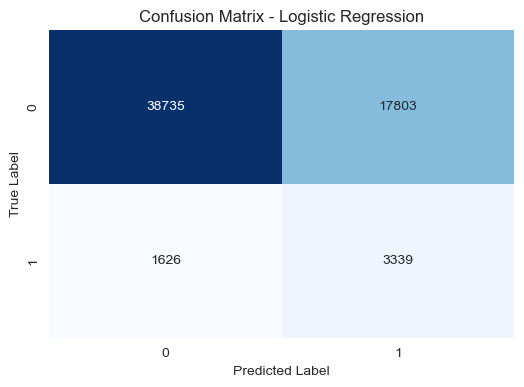


ROC-AUC Score: 0.7397


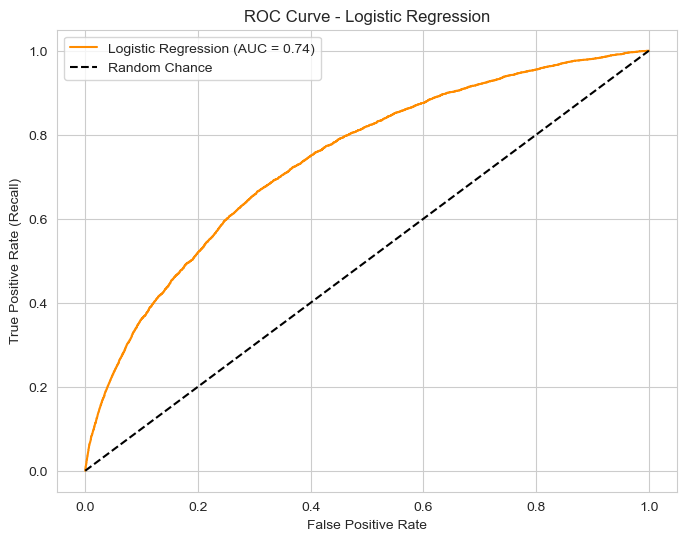

In [26]:
# Inisialisasi Model dengan Class Weight Balanced
logreg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train Model
print("Training Logistic Regression...")
logreg.fit(X_train, y_train)

# Evaluasi
res_lr = evaluate_model(logreg, X_test, y_test, "Logistic Regression")
results_comparison.append(res_lr)

### Decission tree 

Tuning Decision Tree... (Mohon tunggu)
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Parameter Terbaik: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 10}
--- Evaluasi: Decision Tree (Tuned) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.62      0.75     56538
           1       0.14      0.70      0.23      4965

    accuracy                           0.62     61503
   macro avg       0.55      0.66      0.49     61503
weighted avg       0.89      0.62      0.71     61503



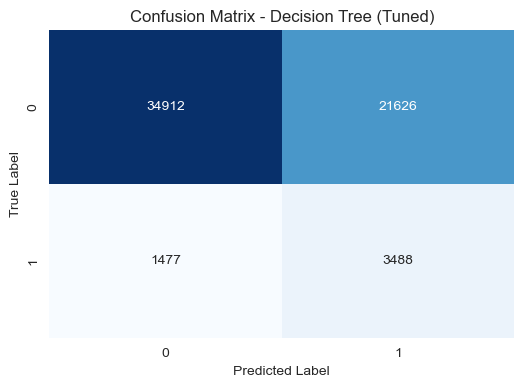


ROC-AUC Score: 0.7126


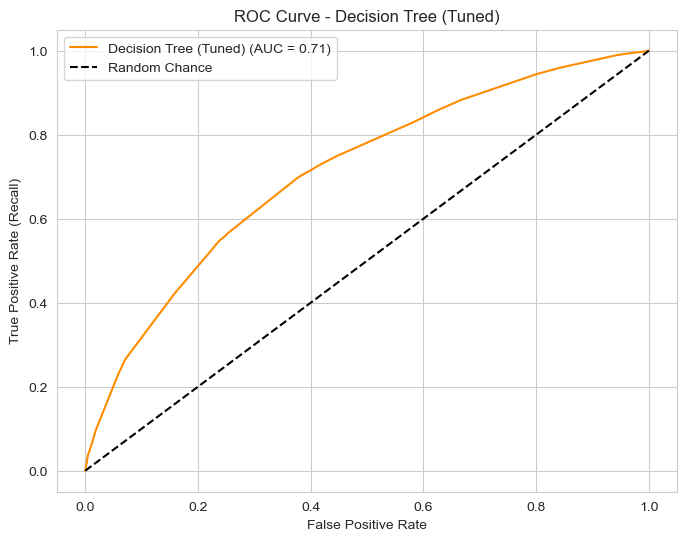

In [27]:
# Parameter yang akan di-tuning
param_grid = {
    'max_depth': [5, 10, 15],          # Jangan terlalu dalam
    'min_samples_leaf': [10, 50, 100], # Mencegah overfitting di daun
    'class_weight': ['balanced']       # Wajib untuk recall
}

dt = DecisionTreeClassifier(random_state=42)

# Grid Search (Mencari kombinasi terbaik)
# scoring='recall' -> Kita suruh mesin cari model dengan Recall terbaik
grid_dt = GridSearchCV(dt, param_grid, cv=3, scoring='recall', n_jobs=-1, verbose=1)

print("Tuning Decision Tree... (Mohon tunggu)")
grid_dt.fit(X_train, y_train)

print(f"Parameter Terbaik: {grid_dt.best_params_}")

# Gunakan model terbaik hasil tuning
best_dt = grid_dt.best_estimator_

# Evaluasi
res_dt = evaluate_model(best_dt, X_test, y_test, "Decision Tree (Tuned)")
results_comparison.append(res_dt)

### XGboost

Ratio Scale Pos Weight: 11.39
Training XGBoost...
--- Evaluasi: XGBoost ---

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     56538
           1       0.17      0.67      0.28      4965

    accuracy                           0.72     61503
   macro avg       0.57      0.70      0.55     61503
weighted avg       0.90      0.72      0.78     61503



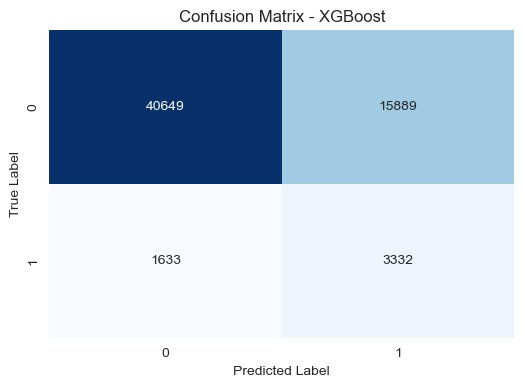


ROC-AUC Score: 0.7617


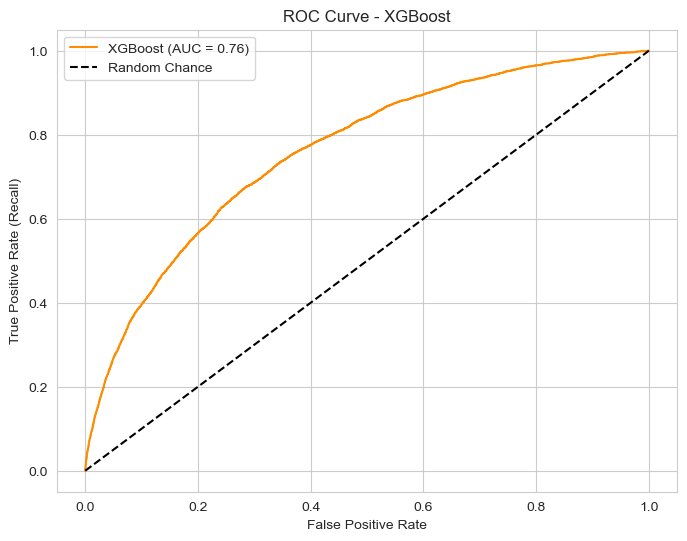

In [28]:
# Hitung Scale Pos Weight
ratio_neg_pos = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Ratio Scale Pos Weight: {ratio_neg_pos:.2f}")

# Inisialisasi XGBoost
xgb_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=ratio_neg_pos, # KUNCI untuk Recall tinggi di XGBoost
    n_estimators=100,               # Jumlah pohon
    max_depth=6,
    learning_rate=0.1,
    n_jobs=-1
)

print("Training XGBoost...")
xgb_model.fit(X_train, y_train)

# Evaluasi
res_xgb = evaluate_model(xgb_model, X_test, y_test, "XGBoost")
results_comparison.append(res_xgb)

### Feature importance

--- Insight: Faktor Penentu Risiko ---


C:\Users\user\AppData\Local\Temp\ipykernel_14472\910417204.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='coolwarm')


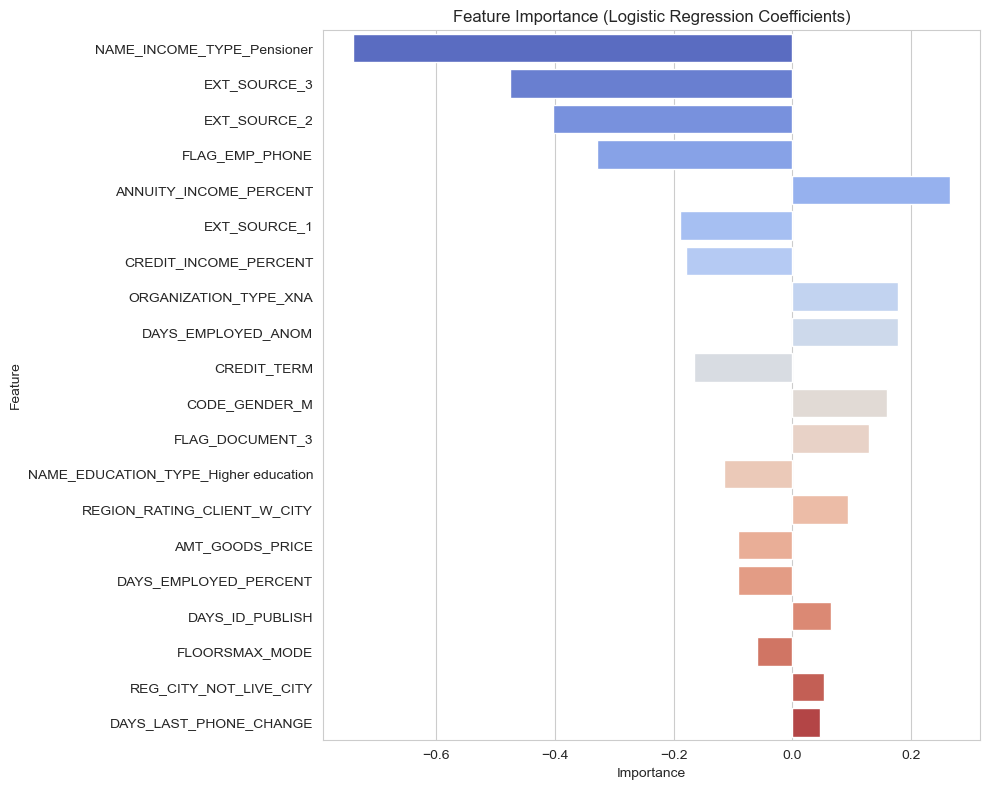

C:\Users\user\AppData\Local\Temp\ipykernel_14472\910417204.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


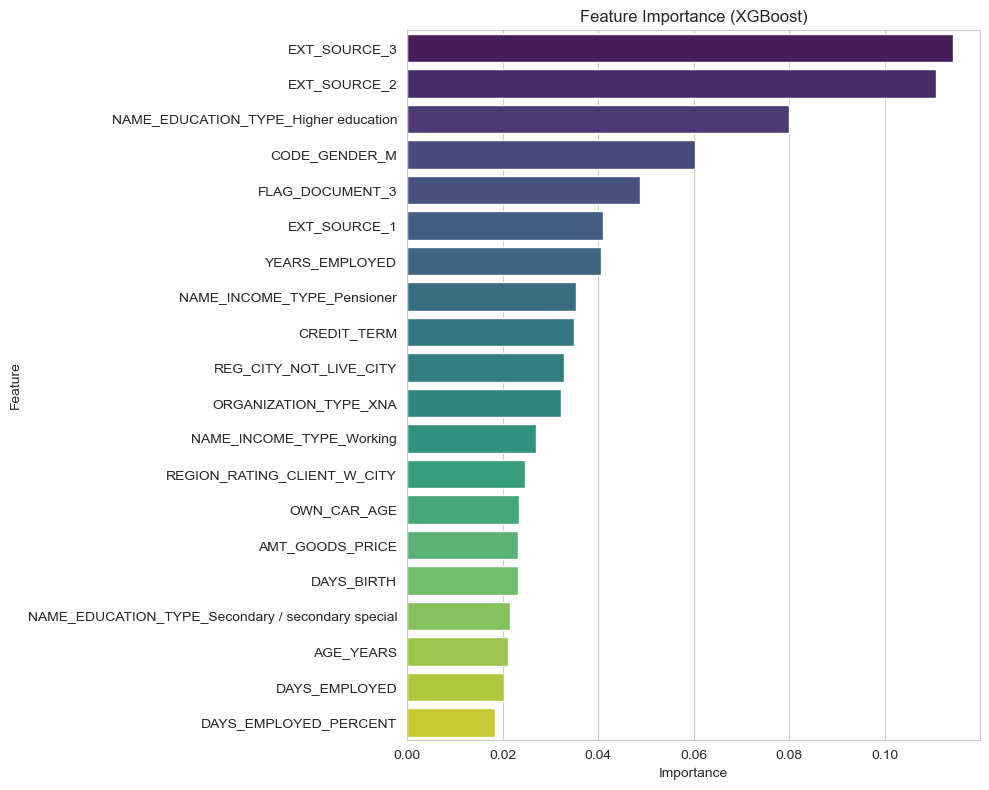

In [29]:
def plot_feature_importance(model, feature_names, model_type='tree'):
    plt.figure(figsize=(10, 8))
    
    if model_type == 'linear':
        importance = model.coef_[0]
        feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
        # Urutkan berdasarkan nilai absolut (kekuatan pengaruh)
        feat_imp['Abs_Importance'] = feat_imp['Importance'].abs()
        feat_imp = feat_imp.sort_values(by='Abs_Importance', ascending=False).head(20)
        
        sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='coolwarm')
        plt.title('Feature Importance (Logistic Regression Coefficients)')
        
    else: # Untuk Tree Based (XGBoost/DT)
        importance = model.feature_importances_
        feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
        feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(20)
        
        sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
        plt.title('Feature Importance (XGBoost)')
        
    plt.tight_layout()
    plt.show()


print("--- Insight: Faktor Penentu Risiko ---")
plot_feature_importance(logreg, feature_names, model_type='linear')
plot_feature_importance(xgb_model, feature_names, model_type='tree')

### Best model

In [30]:
import pandas as pd

print("--- Hasil Akhir ---")
df_results = pd.DataFrame(results_comparison)
df_results = df_results.sort_values(by='Recall (Class 1)', ascending=False)

display(df_results)

winner = df_results.iloc[0]
print(f"\n🏆 Model Pemenang berdasarkan Recall: {winner['Model']}")
print(f"Recall: {winner['Recall (Class 1)']:.2%}")
print(f"ROC-AUC: {winner['ROC-AUC']:.4f}")

--- Hasil Akhir ---


,Model,ROC-AUC,Recall (Class 1)
1,Decision Tree (Tuned),0.712584,0.702518
0,Logistic Regression,0.739720,0.672508
2,XGBoost,0.761718,0.671098



🏆 Model Pemenang berdasarkan Recall: Decision Tree (Tuned)
Recall: 70.25%
ROC-AUC: 0.7126


## Executive Summary

Ringkasan Proyek (Executive Summary): 

1. Data: Kita menganalisis data historis pengajuan kredit Home Credit. Data cukup "kotor" dengan banyak missing values dan imbalanced class (sedikit yang gagal bayar).
2. Temuan Utama (Insight):
- Usia: Nasabah muda (< 30 tahun) memiliki risiko gagal bayar jauh lebih tinggi.
- Skor Eksternal: Fitur EXT_SOURCE (skor dari biro kredit lain) adalah indikator paling valid. Skor rendah = Risiko tinggi.
- Domain Knowledge: Rasio CREDIT_INCOME_PERCENT (Beban hutang vs Gaji) terbukti menjadi fitur prediktif yang kuat.
3. Model:
Kita memilih Decision Tree (Tuned) dengan strategi Class Weighting.
Model ini dioptimalkan untuk metrik Recall, artinya model lebih memprioritaskan "Menangkap penjahat (gagal bayar)" meskipun dengan risiko kadang salah menuduh orang baik (False Positive).